## Amazon customer review - Group 3

In [1]:
# link - https://www.amazon.in/Apple-iPhone-13-128GB-Starlight/dp/B09G9D8KRQ/ref=cm_cr_arp_d_product_top?ie=UTF8

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline

In [3]:
review=pd.read_csv('D:\\Data Science\\Data science project - 2\\iPhone.csv')
review

,Review,Rating
0,"What can I say, absolutely I am enjoying iOS e...",5
1,"Camera is excellent and pictures are sharp,cle...",5
2,Almost The Beast One as 12 pro\nCamera is not ...,5
3,This is another awesome product from Apple..\n...,5
4,In one word fantastic…. Beast of a performer.....,5
...,...,...
327,I bought this phone Bcoz I have lot of money t...,1
328,"Country of Origin China,\nyou can decide your ...",1
329,Camera quality very bad like Android phone bel...,1
330,Android are way better than iOS,1


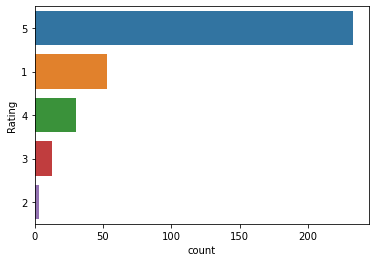

In [4]:
sns.countplot(y='Rating', data=review, order=review.Rating.value_counts().index)
plt.show()

In [5]:
review=[Review.strip() for Review in review.Review] # remove both the leading and the trailing characters
review=[Review for Review in review if Review] # removes empty strings, because they are considered in Python as False
review[0:10]

['What can I say, absolutely I am enjoying iOS experience, and battery life amazing, Best Buy, only thing I missing fingerprint scanner. It’s very irritating each time you have to enter the password. Due to covid we all wear the mask. Otherwise best buy',
 'Camera is excellent and pictures are sharp,clear,natural. Slightly overpriced but you won’t regret in long term.',
 'Almost The Beast One as 12 pro\nCamera is not as 13 pro but the best camers',
 'This is another awesome product from Apple..\n\nWonderful Camera quality\nFeather touch\nGood battery\nSuperb Night mode Camera\n\nOverall, wonderful phone👍',
 'In one word fantastic…. Beast of a performer..\n\nIt good right balance of size and performance\nBattery life is major USP of this mobile …\n\nTwo major Cons :-\n120 htz refresh rate is must have for this price point\nCharging Speed is bit slow but that could be managed by great battery life',
 'Good experience',
 'Fantastic red .. just unboxed it so cannot say about anything else 

In [6]:
# Joining the list into one string/text
review_text=' '.join(review)
review_text

'What can I say, absolutely I am enjoying iOS experience, and battery life amazing, Best Buy, only thing I missing fingerprint scanner. It’s very irritating each time you have to enter the password. Due to covid we all wear the mask. Otherwise best buy Camera is excellent and pictures are sharp,clear,natural. Slightly overpriced but you won’t regret in long term. Almost The Beast One as 12 pro\nCamera is not as 13 pro but the best camers This is another awesome product from Apple..\n\nWonderful Camera quality\nFeather touch\nGood battery\nSuperb Night mode Camera\n\nOverall, wonderful phone👍 In one word fantastic…. Beast of a performer..\n\nIt good right balance of size and performance\nBattery life is major USP of this mobile …\n\nTwo major Cons :-\n120 htz refresh rate is must have for this price point\nCharging Speed is bit slow but that could be managed by great battery life Good experience Fantastic red .. just unboxed it so cannot say about anything else . Loved it . Thank you am

In [7]:
# Remove Punctuations 
no_punc_text=review_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'What can I say absolutely I am enjoying iOS experience and battery life amazing Best Buy only thing I missing fingerprint scanner It’s very irritating each time you have to enter the password Due to covid we all wear the mask Otherwise best buy Camera is excellent and pictures are sharpclearnatural Slightly overpriced but you won’t regret in long term Almost The Beast One as 12 pro\nCamera is not as 13 pro but the best camers This is another awesome product from Apple\n\nWonderful Camera quality\nFeather touch\nGood battery\nSuperb Night mode Camera\n\nOverall wonderful phone👍 In one word fantastic… Beast of a performer\n\nIt good right balance of size and performance\nBattery life is major USP of this mobile …\n\nTwo major Cons \n120 htz refresh rate is must have for this price point\nCharging Speed is bit slow but that could be managed by great battery life Good experience Fantastic red  just unboxed it so cannot say about anything else  Loved it  Thank you amazon Go on without any 

In [8]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['What', 'can', 'I', 'say', 'absolutely', 'I', 'am', 'enjoying', 'iOS', 'experience', 'and', 'battery', 'life', 'amazing', 'Best', 'Buy', 'only', 'thing', 'I', 'missing', 'fingerprint', 'scanner', 'It', '’', 's', 'very', 'irritating', 'each', 'time', 'you', 'have', 'to', 'enter', 'the', 'password', 'Due', 'to', 'covid', 'we', 'all', 'wear', 'the', 'mask', 'Otherwise', 'best', 'buy', 'Camera', 'is', 'excellent', 'and']


In [10]:
len(text_tokens)

8769

In [11]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A','Ive']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['What', 'say', 'absolutely', 'enjoying', 'iOS', 'experience', 'battery', 'life', 'amazing', 'Best', 'Buy', 'thing', 'missing', 'fingerprint', 'scanner', '’', 'irritating', 'time', 'enter', 'password', 'Due', 'covid', 'wear', 'mask', 'Otherwise', 'best', 'buy', 'Camera', 'excellent', 'pictures', 'sharpclearnatural', 'Slightly', 'overpriced', '’', 'regret', 'long', 'term', 'Almost', 'Beast', 'One', '12', 'pro', 'Camera', '13', 'pro', 'best', 'camers', 'This', 'another', 'awesome', 'product', 'Apple', 'Wonderful', 'Camera', 'quality', 'Feather', 'touch', 'Good', 'battery', 'Superb', 'Night', 'mode', 'Camera', 'Overall', 'wonderful', 'phone👍', 'In', 'one', 'word', 'fantastic…', 'Beast', 'performer', 'good', 'right', 'balance', 'size', 'performance', 'Battery', 'life', 'major', 'USP', 'mobile', '…', 'Two', 'major', 'Cons', '120', 'htz', 'refresh', 'rate', 'must', 'price', 'point', 'Charging', 'Speed', 'bit', 'slow', 'could', 'managed', 'great', 'battery', 'life', 'Good', 'experience', 'Fan

In [12]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['what', 'say', 'absolutely', 'enjoying', 'ios', 'experience', 'battery', 'life', 'amazing', 'best', 'buy', 'thing', 'missing', 'fingerprint', 'scanner', '’', 'irritating', 'time', 'enter', 'password', 'due', 'covid', 'wear', 'mask', 'otherwise', 'best', 'buy', 'camera', 'excellent', 'pictures', 'sharpclearnatural', 'slightly', 'overpriced', '’', 'regret', 'long', 'term', 'almost', 'beast', 'one', '12', 'pro', 'camera', '13', 'pro', 'best', 'camers', 'this', 'another', 'awesome', 'product', 'apple', 'wonderful', 'camera', 'quality', 'feather', 'touch', 'good', 'battery', 'superb', 'night', 'mode', 'camera', 'overall', 'wonderful', 'phone👍', 'in', 'one', 'word', 'fantastic…', 'beast', 'performer', 'good', 'right', 'balance', 'size', 'performance', 'battery', 'life', 'major', 'usp', 'mobile', '…', 'two', 'major', 'cons', '120', 'htz', 'refresh', 'rate', 'must', 'price', 'point', 'charging', 'speed', 'bit', 'slow', 'could', 'managed', 'great', 'battery', 'life', 'good', 'experience', 'fan

In [13]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['what', 'say', 'absolut', 'enjoy', 'io', 'experi', 'batteri', 'life', 'amaz', 'best', 'buy', 'thing', 'miss', 'fingerprint', 'scanner', '’', 'irrit', 'time', 'enter', 'password', 'due', 'covid', 'wear', 'mask', 'otherwis', 'best', 'buy', 'camera', 'excel', 'pictur', 'sharpclearnatur', 'slightli', 'overpr', '’', 'regret', 'long', 'term', 'almost', 'beast', 'one', '12', 'pro', 'camera', '13', 'pro', 'best', 'camer', 'thi', 'anoth', 'awesom', 'product', 'appl', 'wonder', 'camera', 'qualiti', 'feather', 'touch', 'good', 'batteri', 'superb', 'night', 'mode', 'camera', 'overal', 'wonder', 'phone👍', 'in', 'one', 'word', 'fantastic…', 'beast', 'perform', 'good', 'right', 'balanc', 'size', 'perform', 'batteri', 'life', 'major', 'usp', 'mobil', '…', 'two', 'major', 'con', '120', 'htz', 'refresh', 'rate', 'must', 'price', 'point', 'charg', 'speed', 'bit', 'slow', 'could', 'manag', 'great', 'batteri', 'life', 'good', 'experi', 'fantast', 'red', 'unbox', 'say', 'anyth', 'els', 'love', 'thank', 'am

In [14]:
# Lemmatization
nlp=spacy.load('en_core_web_md')
doc=nlp(' '.join(lower_words))
print(doc)

what say absolutely enjoying ios experience battery life amazing best buy thing missing fingerprint scanner ’ irritating time enter password due covid wear mask otherwise best buy camera excellent pictures sharpclearnatural slightly overpriced ’ regret long term almost beast one 12 pro camera 13 pro best camers this another awesome product apple wonderful camera quality feather touch good battery superb night mode camera overall wonderful phone👍 in one word fantastic… beast performer good right balance size performance battery life major usp mobile … two major cons 120 htz refresh rate must price point charging speed bit slow could managed great battery life good experience fantastic red unboxed say anything else loved thank amazon go without hesitation👍 thought upgrading 11 13 would hassle could transfer data 11 13 easily never even connect pc download app this looks professional colour perfect👍 nice product you ’ need write anything comes iphone iphone rules world simply amazing… pri

In [15]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['what', 'say', 'absolutely', 'enjoy', 'io', 'experience', 'battery', 'life', 'amaze', 'good', 'buy', 'thing', 'miss', 'fingerprint', 'scanner', "'", 'irritate', 'time', 'enter', 'password', 'due', 'covid', 'wear', 'mask', 'otherwise', 'good', 'buy', 'camera', 'excellent', 'picture', 'sharpclearnatural', 'slightly', 'overpriced', "'", 'regret', 'long', 'term', 'almost', 'beast', 'one', '12', 'pro', 'camera', '13', 'pro', 'good', 'camer', 'this', 'another', 'awesome', 'product', 'apple', 'wonderful', 'camera', 'quality', 'feather', 'touch', 'good', 'battery', 'superb', 'night', 'mode', 'camera', 'overall', 'wonderful', 'phone', '👍', 'in', 'one', 'word', 'fantastic', '…', 'beast', 'performer', 'good', 'right', 'balance', 'size', 'performance', 'battery', 'life', 'major', 'usp', 'mobile', '…', 'two', 'major', 'con', '120', 'htz', 'refresh', 'rate', 'must', 'price', 'point', 'charge', 'speed', 'bit', 'slow', 'could', 'manage', 'great', 'battery', 'life', 'good', 'experience', 'fantastic', 

In [16]:
clean_reviews=' '.join(lemmas)
clean_reviews

'what say absolutely enjoy io experience battery life amaze good buy thing miss fingerprint scanner \' irritate time enter password due covid wear mask otherwise good buy camera excellent picture sharpclearnatural slightly overpriced \' regret long term almost beast one 12 pro camera 13 pro good camer this another awesome product apple wonderful camera quality feather touch good battery superb night mode camera overall wonderful phone 👍 in one word fantastic … beast performer good right balance size performance battery life major usp mobile … two major con 120 htz refresh rate must price point charge speed bit slow could manage great battery life good experience fantastic red unboxed say anything else love thank amazon go without hesitation 👍 think upgrade 11 13 would hassle could transfer datum 11 13 easily never even connect pc download app this look professional colour perfect 👍 nice product you \' need write anything come iphone iphone rule world simply amazing … price much though 

## Feature Extraction

## 1. Using CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [18]:
print(cv.vocabulary_)

{'what': 1296, 'say': 1046, 'absolutely': 83, 'enjoy': 418, 'io': 648, 'experience': 447, 'battery': 174, 'life': 703, 'amaze': 119, 'good': 544, 'buy': 242, 'thing': 1200, 'miss': 780, 'fingerprint': 487, 'scanner': 1050, 'irritate': 658, 'time': 1211, 'enter': 422, 'password': 891, 'due': 397, 'covid': 324, 'wear': 1291, 'mask': 757, 'otherwise': 875, 'camera': 250, 'excellent': 436, 'picture': 917, 'sharpclearnatural': 1084, 'slightly': 1103, 'overpriced': 882, 'regret': 996, 'long': 720, 'term': 1190, 'almost': 113, 'beast': 180, 'one': 856, '12': 7, 'pro': 950, '13': 13, 'camer': 249, 'this': 1204, 'another': 131, 'awesome': 157, 'product': 954, 'apple': 139, 'wonderful': 1314, 'quality': 971, 'feather': 474, 'touch': 1223, 'superb': 1171, 'night': 830, 'mode': 784, 'overall': 880, 'phone': 907, 'in': 626, 'word': 1317, 'fantastic': 470, 'performer': 902, 'right': 1025, 'balance': 166, 'size': 1101, 'performance': 901, 'major': 741, 'usp': 1260, 'mobile': 783, 'two': 1232, 'con': 

In [19]:
print(cv.get_feature_names()[150:300])

['atleast', 'attractive', 'aur', 'authentic', 'available', 'average', 'avg', 'awesome', 'awesomelook', 'awfull', 'awosome', 'awsome', 'back', 'backup', 'bad', 'badly', 'balance', 'balanced', 'bank', 'bar', 'base', 'basic', 'basically', 'batter', 'battery', 'batteryyy', 'battry', 'baught', 'bcoz', 'be', 'beast', 'beautiful', 'beauty', 'because', 'become', 'before', 'begin', 'behind', 'believe', 'belkin', 'bend', 'besides', 'best', 'beware', 'beyond', 'bgf', 'bgmi', 'bhi', 'big', 'bigggggg', 'bilkul', 'biometric', 'bionic', 'birthday', 'bit', 'bizarre', 'bjp', 'black', 'blame', 'bless', 'blindly', 'blink', 'blow', 'blue', 'body', 'bolu', 'boo', 'book', 'bore', 'boring', 'bot', 'both', 'bother', 'bottom', 'box', 'brainer', 'brand', 'break', 'brick', 'bright', 'brightness', 'brilliant', 'broken', 'bsic', 'budget', 'bug', 'build', 'bummer', 'bunch', 'but', 'buttery', 'button', 'buy', 'buying', 'cable', 'call', 'callsvery', 'cam', 'camara', 'camer', 'camera', 'cameras', 'can', 'card', 'care'

In [20]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
print(reviewscv.toarray().shape)

(5550, 1341)


## 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [22]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [23]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['11', '12', '13', 'almost', 'also', 'amazing', 'amazon', 'and', 'android', 'apple', 'awesome', 'backup', 'battery', 'big', 'but', 'buy', 'camera', 'change', 'charge', 'charger', 'colour', 'compare', 'day', 'device', 'difference', 'display', 'do', 'even', 'everything', 'experience', 'fast', 'feature', 'feel', 'find', 'first', 'get', 'give', 'go', 'good', 'great', 'happy', 'heating', 'high', 'if', 'io', 'ios', 'iphone', 'issue', 'its', 'life', 'like', 'look', 'lot', 'love', 'make', 'mobile', 'money', 'much', 'new', 'nice', 'no', 'not', 'offer', 'old', 'one', 'oneplus', 'option', 'overall', 'perfect', 'performance', 'phone', 'play', 'price', 'pro', 'product', 'purchase', 'quality', 'really', 'recommend', 'samsung', 'screen', 'switch', 'thank', 'thing', 'think', 'this', 'though', 'time', 'upgrade', 'use', 'user', 'value', 'very', 'video', 'want', 'well', 'work', 'worth', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 

## 3. TF-IDF Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [25]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '1010', '11', '12', '120', '120hz', '128', '13', '15', '1st', '20', '20w', '55', '60hz', '90hz', 'absolutely', 'actually', 'additional', 'afford', 'after', 'ahead', 'airtel', 'all', 'almost', 'already', 'also', 'always', 'amazing', 'amazon', 'and', 'android', 'another', 'anything', 'apart', 'app', 'apple', 'as', 'ask', 'aspect', 'attractive', 'awesome', 'back', 'backup', 'bad', 'bar', 'base', 'basic', 'battery', 'be', 'beast', 'big', 'bit', 'black', 'blow', 'blue', 'box', 'brand', 'break', 'brick', 'bright', 'bug', 'build', 'but', 'buttery', 'button', 'buy', 'cable', 'call', 'camara', 'camera', 'can', 'change', 'charge', 'charger', 'cheap', 'choose', 'cinematic', 'class', 'click', 'colour', 'come', 'comment', 'compare', 'con', 'connect', 'contact', 'cost', 'could', 'create', 'customer', 'date', 'datum', 'day', 'decent', 'decision', 'definitely', 'deliver', 'delivery', 'design', 'device', 'difference', 'different', 'directly', 'discount', 'display', 'do', 'doubt', 'download', 'dr

## Generate Word Cloud

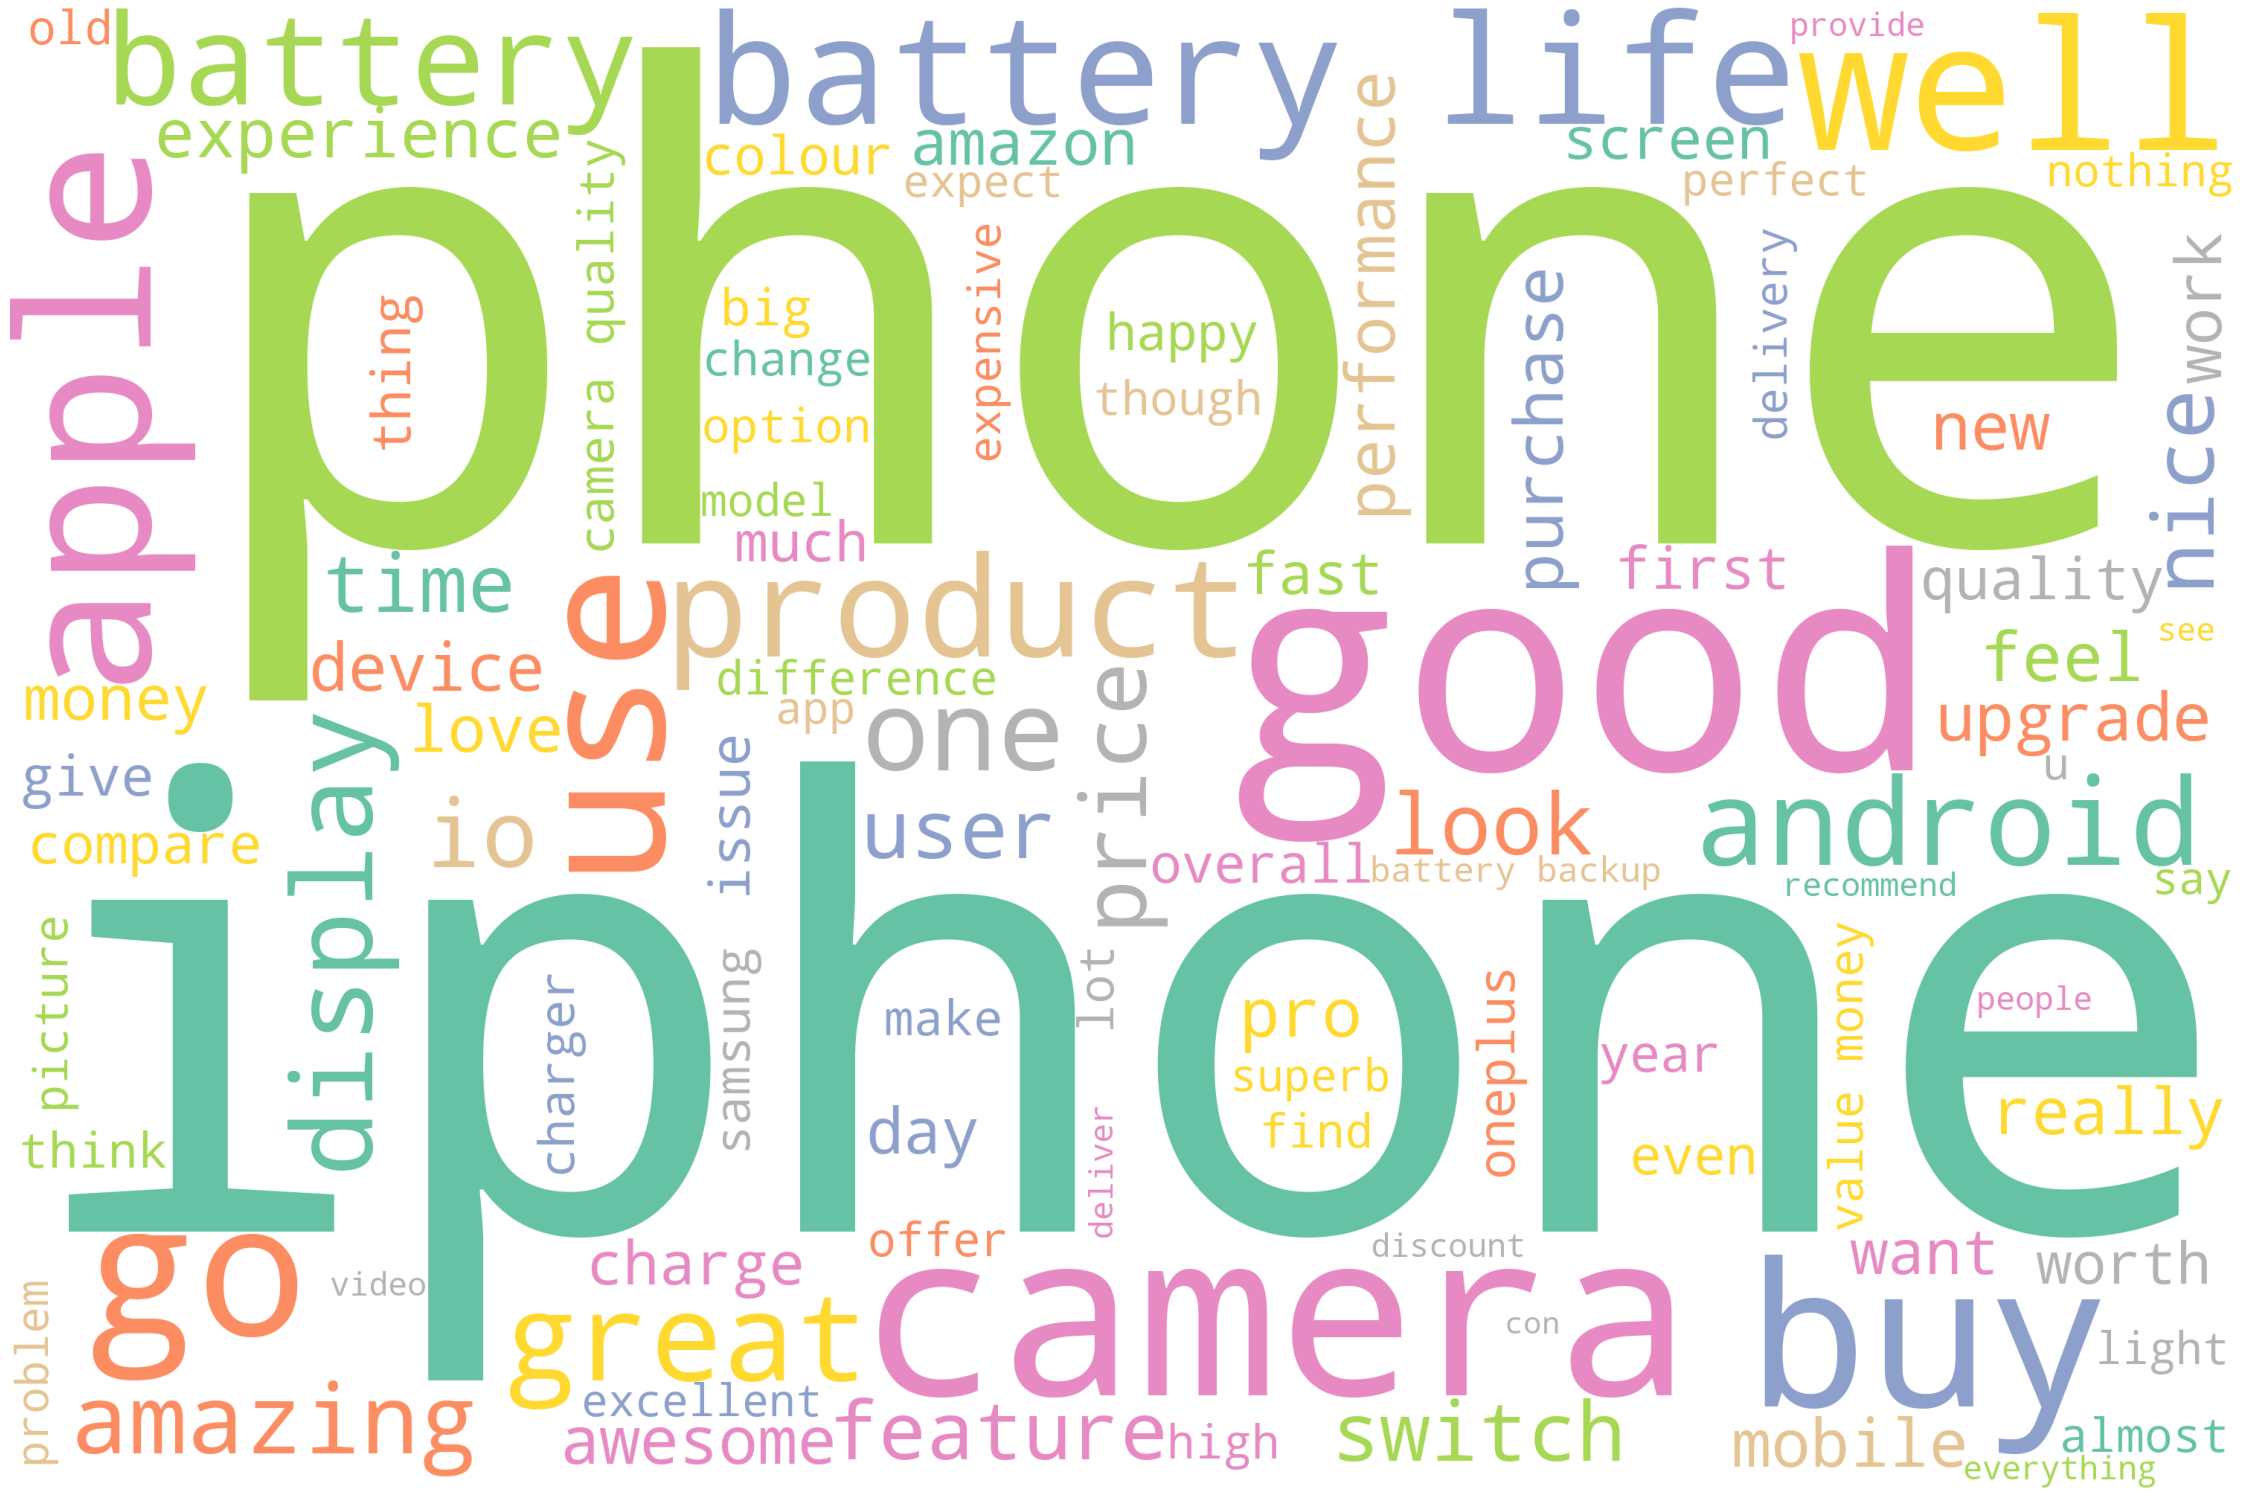

In [26]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [27]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_md')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [28]:
for token in doc_block[100:200]:
    print(token,token.pos_)

manage VERB
great ADJ
battery NOUN
life NOUN
good ADJ
experience NOUN
fantastic ADJ
red ADJ
unboxed ADJ
say VERB
anything PRON
else ADV
love VERB
thank VERB
amazon PROPN
go VERB
without ADP
hesitation NOUN
👍 PROPN
think VERB
upgrade VERB
11 NUM
13 NUM
would AUX
hassle NOUN
could AUX
transfer VERB
datum NOUN
11 NUM
13 NUM
easily ADV
never ADV
even ADV
connect VERB
pc NOUN
download NOUN
app NOUN
this PRON
look VERB
professional ADJ
colour NOUN
perfect ADJ
👍 NOUN
nice ADJ
product NOUN
you PRON
' PUNCT
need VERB
write VERB
anything PRON
come VERB
iphone PROPN
iphone PROPN
rule NOUN
world NOUN
simply ADV
amazing ADJ
… PUNCT
price NOUN
much ADJ
though SCONJ
disappointing ADJ
thing NOUN
stop AUX
give VERB
proper ADJ
charger NOUN
also ADV
earphone NOUN
intelligent ADJ
device NOUN
amazing ADJ
camera NOUN
display NOUN
multitaske NOUN
support VERB
battery NOUN
performance NOUN
ram NOUN
management NOUN
recieve VERB
product NOUN
good ADJ
condition NOUN
time NOUN
pack NOUN
good ADJ
this DET
first AD

In [29]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['apple', 'product', '😍', 'camera', 'display', 'battery', 'connectivity', 'issue', 'face', 'g', 'allrounder', 'phone', 'recommend', 'product', 'deliver', 'ackage', 'delivery', 'thank', '😍', 'phone', 'get', 'republic', 'sale', 'battery', 'performance', 'improve', 'apple', 'picture', 'quality', 'awesomelook', 'phone', 'performance', 'look', 'hand', 'phone', 'look', 'camera', 'camera', 'quality', 'use', 'product', 'phone', 'version', 'performance', 'say', 'battery', 'life', 'excellence', 'screen', 'display', 'feel', 'work', 'display', 'feel', 'phone', 'os', 'camera', 'battery', 'backup', 'phone', 'product', 'delivery', 'amazon', 'thank', 'seller', 'product', 'model', 'display', 'variation', 'android', 'mobile', 'go', 'need', 'class', 'recommend', 'wait', 'offer', 'get', 'camera', 'battery', 'life', 'display', 'look', 'offering', 'gift', 'wife', 'live', 'kidney', 'experience', '1st', 'iphone', 'usage', 'battery', 'life', 'bit', 'penny', 'iphone', 'connectivity', 'sound', 'clarity']


In [30]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,174
1,battery,101
2,camera,94
3,iphone,84
4,buy,61
5,go,54
6,life,52
7,product,49
8,use,49
9,apple,46


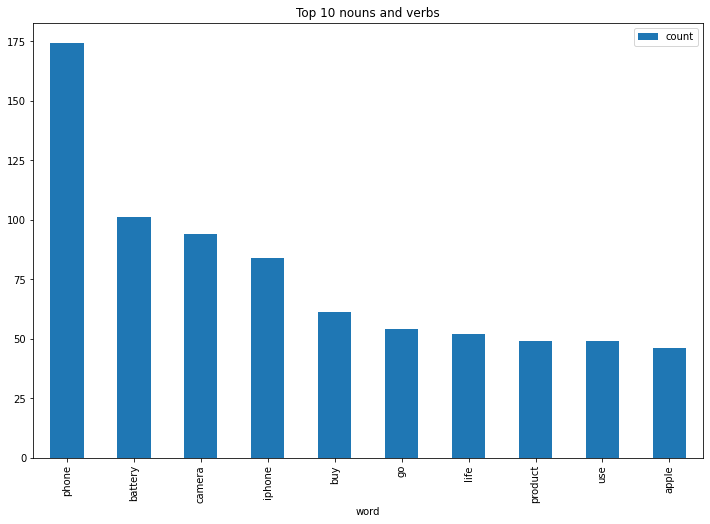

In [31]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Sentiment Analysis

In [32]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(review))
sentences

['What can I say, absolutely I am enjoying iOS experience, and battery life amazing, Best Buy, only thing I missing fingerprint scanner.',
 'It’s very irritating each time you have to enter the password.',
 'Due to covid we all wear the mask.',
 'Otherwise best buy Camera is excellent and pictures are sharp,clear,natural.',
 'Slightly overpriced but you won’t regret in long term.',
 'Almost The Beast One as 12 pro\nCamera is not as 13 pro but the best camers This is another awesome product from Apple..',
 'Wonderful Camera quality\nFeather touch\nGood battery\nSuperb Night mode Camera\n\nOverall, wonderful phone👍 In one word fantastic….',
 'Beast of a performer..',
 'It good right balance of size and performance\nBattery life is major USP of this mobile …\n\nTwo major Cons :-\n120 htz refresh rate is must have for this price point\nCharging Speed is bit slow but that could be managed by great battery life Good experience Fantastic red .. just unboxed it so cannot say about anything els

In [33]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"What can I say, absolutely I am enjoying iOS e..."
1,It’s very irritating each time you have to ent...
2,Due to covid we all wear the mask.
3,Otherwise best buy Camera is excellent and pic...
4,Slightly overpriced but you won’t regret in lo...
...,...
570,"Country of Origin China,\nyou can decide your ..."
571,But India origin and manufacture only.
572,Thank you for considering it.
573,Camera quality very bad like Android phone bel...


In [34]:
# Emotion Lexicon - Affin
affin=pd.read_csv('D:\\Data Science\\Notes\\Emotion mining\\Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [35]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [36]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_md')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [37]:
# manual testing
calculate_sentiment(text='good service')

3

In [38]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      4
1     -3
2      0
3      8
4     -2
      ..
570    0
571    0
572    2
573    1
574    0
Name: sentiment_value, Length: 575, dtype: int64

In [39]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      22
1      11
2       8
3      10
4       9
       ..
570     9
571     6
572     5
573    36
574    13
Name: word_count, Length: 575, dtype: int64

In [40]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
549,"No big difference between iphone 12 and 13 , w...",-7,37
280,Believe me just ignore those stupid negative c...,-5,19
281,Because Nothing fraud is going to happen with ...,-4,10
16,The only disappointing thing is that they have...,-4,18
547,Ok I had iPhone 12 already… I couldn’t found a...,-4,79
...,...,...,...
34,Best of class\n\nRecommend to wait for any off...,22,39
36,Experiencing 1st iphone usage.. battery life i...,22,57
69,Nice phone and battery backup improve other ip...,22,39
30,"Best product Excellent phone, far better than ...",26,55


In [41]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    575.000000
mean       2.151304
std        4.151285
min       -7.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       27.000000
Name: sentiment_value, dtype: float64

In [42]:
# negative sentiment score of the whole review
neg=sent_df[sent_df['sentiment_value']<0]
neg

,sentence,sentiment_value,word_count
1,It’s very irritating each time you have to ent...,-3,11
4,Slightly overpriced but you won’t regret in lo...,-2,9
16,The only disappointing thing is that they have...,-4,18
33,Just go for it no need any explorer.,-1,8
35,But it's very difficult to live with one kidne...,-1,9
...,...,...,...
551,"I regretted it, you will too.",-2,6
554,Most importantly Amazon denies the replacement...,-2,8
557,You have to pay 95000+ for this stupid phone w...,-3,30
563,I had a bad experience….,-3,5


In [43]:
# neutral sentiment score of the whole review
sent_df[sent_df['sentiment_value']==0]

,sentence,sentiment_value,word_count
2,Due to covid we all wear the mask.,0,8
7,Beast of a performer..,0,4
11,I could transfer all my data from 11 to 13 ver...,0,24
14,You don’t need to write anything when it comes...,0,17
22,Got on discount in republic sale.,0,6
...,...,...,...
567,Too expensive at 90K range.,0,5
568,Better wait for new versions so that the price...,0,15
570,"Country of Origin China,\nyou can decide your ...",0,9
571,But India origin and manufacture only.,0,6


In [44]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,"What can I say, absolutely I am enjoying iOS e...",4,22
3,Otherwise best buy Camera is excellent and pic...,8,10
5,Almost The Beast One as 12 pro\nCamera is not ...,7,24
6,Wonderful Camera quality\nFeather touch\nGood ...,15,18
8,It good right balance of size and performance\...,13,61
...,...,...,...
548,If don’t trust buy iPhone and experience it.,1,8
555,I went to the apple service centre they kept t...,2,15
569,"SLIGHT speed difference, more batter backup fo...",1,54
572,Thank you for considering it.,2,5


In [45]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"What can I say, absolutely I am enjoying iOS e...",4,22,0
1,It’s very irritating each time you have to ent...,-3,11,1
2,Due to covid we all wear the mask.,0,8,2
3,Otherwise best buy Camera is excellent and pic...,8,10,3
4,Slightly overpriced but you won’t regret in lo...,-2,9,4
...,...,...,...,...
570,"Country of Origin China,\nyou can decide your ...",0,9,570
571,But India origin and manufacture only.,0,6,571
572,Thank you for considering it.,2,5,572
573,Camera quality very bad like Android phone bel...,1,36,573


In [46]:
conditions=[(sent_df['sentiment_value']>=4),(sent_df['sentiment_value']>0)&(sent_df['sentiment_value']<=3),(sent_df['sentiment_value']==0),(sent_df['sentiment_value']<0)&(sent_df['sentiment_value']>=-3),(sent_df['sentiment_value']<-3)]
values=['Extremely positive','Positive','Neutral','Negetive','Extremely Negetive']
sent_df['Sentiment_of_the_Review']=np.select(conditions,values)
sent_df

,sentence,sentiment_value,word_count,index,Sentiment_of_the_Review
0,"What can I say, absolutely I am enjoying iOS e...",4,22,0,Extremely positive
1,It’s very irritating each time you have to ent...,-3,11,1,Negetive
2,Due to covid we all wear the mask.,0,8,2,Neutral
3,Otherwise best buy Camera is excellent and pic...,8,10,3,Extremely positive
4,Slightly overpriced but you won’t regret in lo...,-2,9,4,Negetive
...,...,...,...,...,...
570,"Country of Origin China,\nyou can decide your ...",0,9,570,Neutral
571,But India origin and manufacture only.,0,6,571,Neutral
572,Thank you for considering it.,2,5,572,Positive
573,Camera quality very bad like Android phone bel...,1,36,573,Positive


In [47]:
expos=sent_df.sort_values("sentiment_value",ascending=False)
expos[0:10]

,sentence,sentiment_value,word_count,index,Sentiment_of_the_Review
326,Worth product Very Nice mobile Best phone in t...,27,33,326,Extremely positive
30,"Best product Excellent phone, far better than ...",26,55,30,Extremely positive
36,Experiencing 1st iphone usage.. battery life i...,22,57,36,Extremely positive
34,Best of class\n\nRecommend to wait for any off...,22,39,34,Extremely positive
69,Nice phone and battery backup improve other ip...,22,39,69,Extremely positive
338,"The phone is simply great, however costs much ...",20,111,338,Extremely positive
137,Note: 1 saal ruppee showoff k liye hi dete h m...,18,41,137,Extremely positive
374,Call recording feature for Indians is needed f...,17,38,374,Extremely positive
46,"Go for starlight or pink, no finger prints at ...",17,45,46,Extremely positive
75,Awesome product Let’s see how it work Amazing ...,16,15,75,Extremely positive


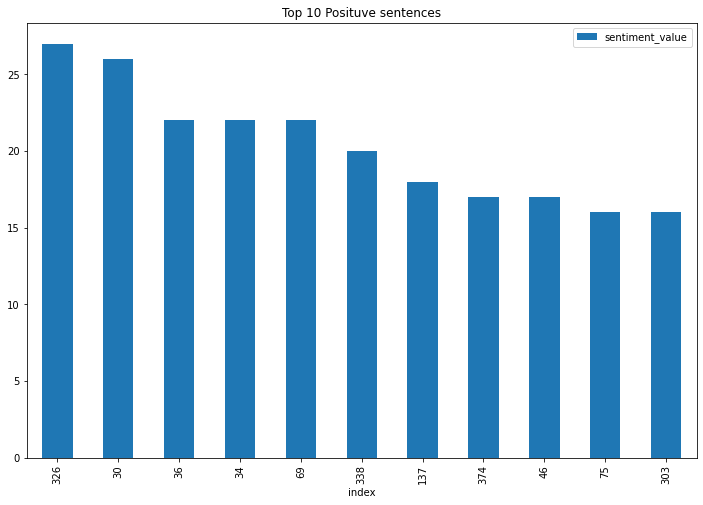

In [48]:
expos[0:11].plot.bar(x='index',y='sentiment_value',figsize=(12,8),title='Top 10 Posituve sentences');

In [49]:
exneg=sent_df.sort_values("sentiment_value",ascending=True)
exneg[0:10]

,sentence,sentiment_value,word_count,index,Sentiment_of_the_Review
549,"No big difference between iphone 12 and 13 , w...",-7,37,549,Extremely Negetive
280,Believe me just ignore those stupid negative c...,-5,19,280,Extremely Negetive
281,Because Nothing fraud is going to happen with ...,-4,10,281,Extremely Negetive
16,The only disappointing thing is that they have...,-4,18,16,Extremely Negetive
547,Ok I had iPhone 12 already… I couldn’t found a...,-4,79,547,Extremely Negetive
288,Only bummer is the lack of 20W charger in the ...,-4,11,288,Extremely Negetive
94,"Unlike android, I do not have to worry for ext...",-3,15,94,Negetive
521,Battery life is worst .,-3,5,521,Negetive
557,You have to pay 95000+ for this stupid phone w...,-3,30,557,Negetive
503,"Phone, Email & SMS management extremely unfrie...",-3,24,503,Negetive


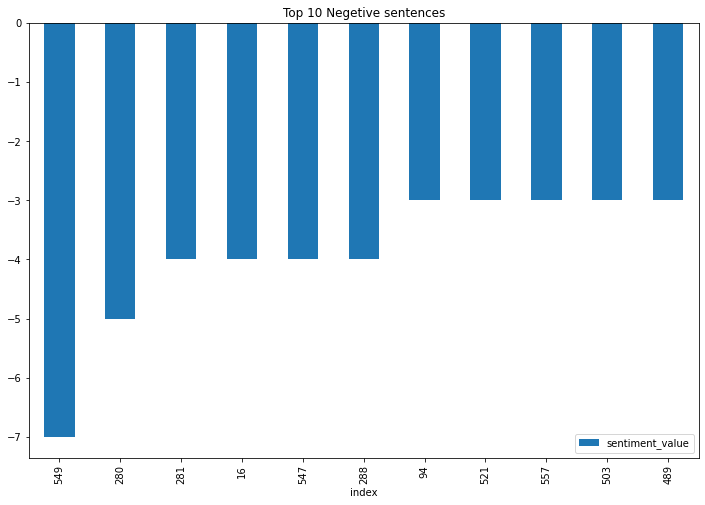

In [50]:
exneg[0:11].plot.bar(x='index',y='sentiment_value',figsize=(12,8),title='Top 10 Negetive sentences');

In [51]:
s=sent_df.Sentiment_of_the_Review

In [52]:
counts=s.value_counts()
counts

Neutral               219
Positive              152
Extremely positive    131
Negetive               67
Extremely Negetive      6
Name: Sentiment_of_the_Review, dtype: int64

In [53]:
pi=pd.DataFrame(data=counts)
pi

,Sentiment_of_the_Review
Neutral,219
Positive,152
Extremely positive,131
Negetive,67
Extremely Negetive,6


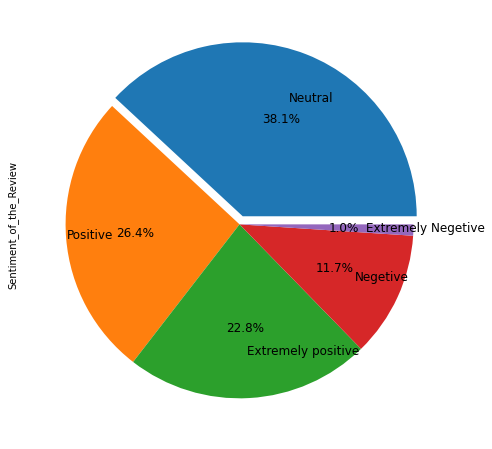

In [54]:
pi.plot.pie(y='Sentiment_of_the_Review',figsize=(8,8),legend=False,fontsize=12,labeldistance=0.73,explode=(0.05,0,0,0,0),autopct='%1.1f%%');

In [55]:
# sent_df.to_csv("D:\\Data Science\\Data science project - 2\\clean_data.csv")

D:\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

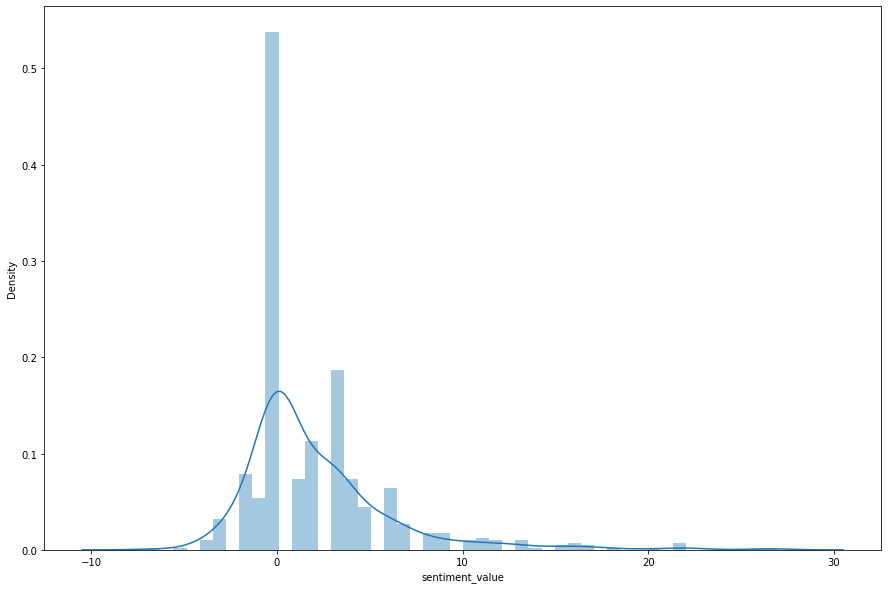

In [56]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

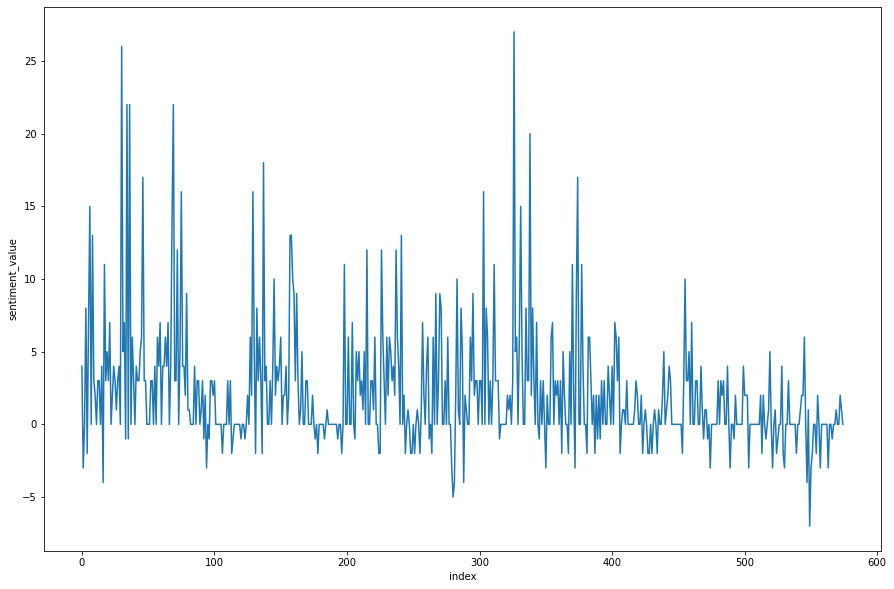

In [57]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

## Sentiment Analysis using VADER

In [58]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

In [60]:
a='This is very bad'
sid.polarity_scores(a)

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849}

In [61]:
df=pd.read_csv("D:\\Data Science\\Data science project - 2\\clean_data.csv")
df.head()

,index,label,review
0,1,Extremely positive,"What can I say, absolutely I am enjoying iOS e..."
1,2,Negetive,It’s very irritating each time you have to ent...
2,3,Neutral,Due to covid we all wear the mask.
3,4,Extremely positive,Otherwise best buy Camera is excellent and pic...
4,5,Negetive,Slightly overpriced but you won’t regret in lo...


In [62]:
df['scores']=df['review'].apply(lambda review: sid.polarity_scores(review))
df.head()

,index,label,review,scores
0,1,Extremely positive,"What can I say, absolutely I am enjoying iOS e...","{'neg': 0.076, 'neu': 0.519, 'pos': 0.404, 'co..."
1,2,Negetive,It’s very irritating each time you have to ent...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp..."
2,3,Neutral,Due to covid we all wear the mask.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,4,Extremely positive,Otherwise best buy Camera is excellent and pic...,"{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'comp..."
4,5,Negetive,Slightly overpriced but you won’t regret in lo...,"{'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'comp..."


In [63]:
df['compound']=df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,index,label,review,scores,compound
0,1,Extremely positive,"What can I say, absolutely I am enjoying iOS e...","{'neg': 0.076, 'neu': 0.519, 'pos': 0.404, 'co...",0.8880
1,2,Negetive,It’s very irritating each time you have to ent...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp...",-0.5095
2,3,Neutral,Due to covid we all wear the mask.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,4,Extremely positive,Otherwise best buy Camera is excellent and pic...,"{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'comp...",0.8360
4,5,Negetive,Slightly overpriced but you won’t regret in lo...,"{'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'comp...",-0.5719


In [64]:
condition=[(df['compound']>0.5),(df['compound']>0)&(df['compound']<=0.5),(df['compound']==0),(df['compound']>=-0.5)&(df['compound']<0),(df['compound']<-0.5)]
value=['Extremely positive','Positive','Neutral','Negetive','Extremely Negetive']
df['Sentiment_of_the_Review']=np.select(condition,value)
df

,index,label,review,scores,compound,Sentiment_of_the_Review
0,1,Extremely positive,"What can I say, absolutely I am enjoying iOS e...","{'neg': 0.076, 'neu': 0.519, 'pos': 0.404, 'co...",0.8880,Extremely positive
1,2,Negetive,It’s very irritating each time you have to ent...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp...",-0.5095,Extremely Negetive
2,3,Neutral,Due to covid we all wear the mask.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,4,Extremely positive,Otherwise best buy Camera is excellent and pic...,"{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'comp...",0.8360,Extremely positive
4,5,Negetive,Slightly overpriced but you won’t regret in lo...,"{'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'comp...",-0.5719,Extremely Negetive
...,...,...,...,...,...,...
570,571,Neutral,"Country of Origin China,\nyou can decide your ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
571,572,Neutral,But India origin and manufacture only.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
572,573,Positive,Thank you for considering it.,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.3612,Positive
573,574,Positive,Camera quality very bad like Android phone bel...,"{'neg': 0.135, 'neu': 0.773, 'pos': 0.092, 'co...",-0.4005,Negetive


In [65]:
# df.to_csv("D:\\Data Science\\Data science project - 2\\final_data.csv")

In [66]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [67]:
print(classification_report(df['label'],df['Sentiment_of_the_Review']))

                    precision    recall  f1-score   support

Extremely Negetive       0.17      0.83      0.28         6
Extremely positive       0.65      0.92      0.76       131
          Negetive       0.61      0.51      0.55        67
           Neutral       0.91      0.77      0.84       219
          Positive       0.61      0.48      0.54       152

          accuracy                           0.70       575
         macro avg       0.59      0.70      0.59       575
      weighted avg       0.73      0.70      0.70       575



In [68]:
print(confusion_matrix(df['label'],df['Sentiment_of_the_Review']))

[[  5   0   0   0   1]
 [  0 120   3   1   7]
 [ 18   0  34   5  10]
 [  3   8  11 169  28]
 [  4  57   8  10  73]]


In [69]:
accuracy_score(df['label'],df['Sentiment_of_the_Review'])

0.697391304347826

In [70]:
w=df.Sentiment_of_the_Review

In [71]:
count=w.value_counts()
count

Extremely positive    185
Neutral               185
Positive              119
Negetive               56
Extremely Negetive     30
Name: Sentiment_of_the_Review, dtype: int64

In [72]:
chart=pd.DataFrame(data=count)
chart

,Sentiment_of_the_Review
Extremely positive,185
Neutral,185
Positive,119
Negetive,56
Extremely Negetive,30


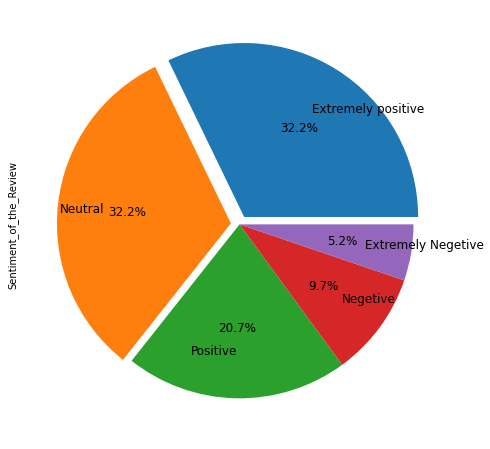

In [73]:
chart.plot.pie(y='Sentiment_of_the_Review',figsize=(8,8),legend=False,fontsize=12,labeldistance=0.73,explode=(0.05,0.05,0,0,0),autopct='%1.1f%%');

D:\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compound', ylabel='Density'>

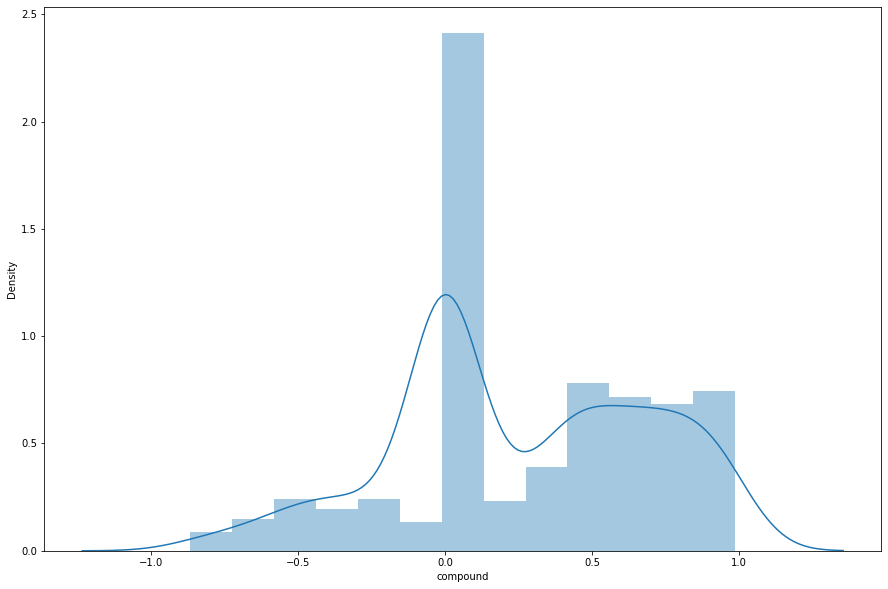

In [74]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [75]:
line=df
line=line.drop(["label","review","scores","compound","index"],axis=1)
line

,Sentiment_of_the_Review
0,Extremely positive
1,Extremely Negetive
2,Neutral
3,Extremely positive
4,Extremely Negetive
...,...
570,Neutral
571,Neutral
572,Positive
573,Negetive


<AxesSubplot:xlabel='index', ylabel='compound'>

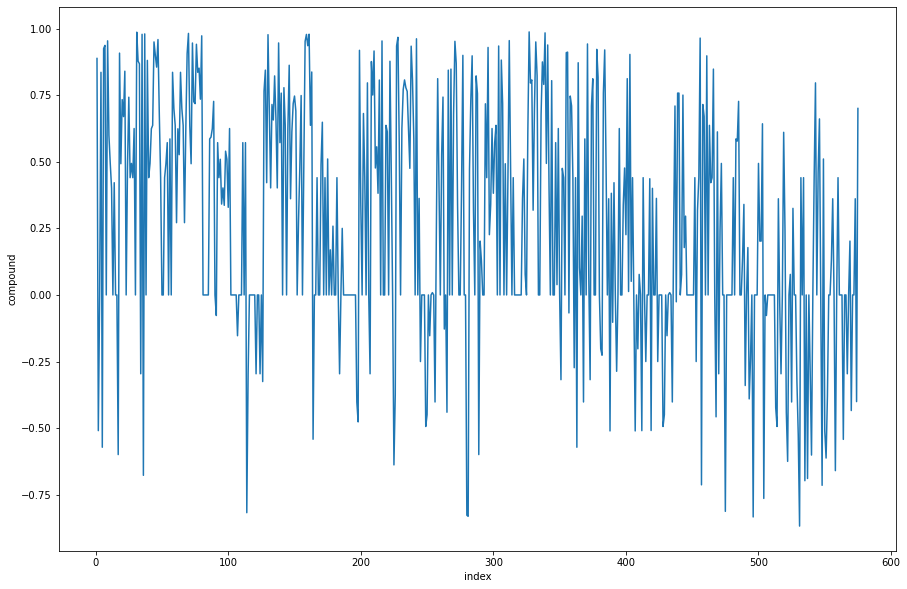

In [76]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='compound',x='index',data=df)

In [77]:
df

,index,label,review,scores,compound,Sentiment_of_the_Review
0,1,Extremely positive,"What can I say, absolutely I am enjoying iOS e...","{'neg': 0.076, 'neu': 0.519, 'pos': 0.404, 'co...",0.8880,Extremely positive
1,2,Negetive,It’s very irritating each time you have to ent...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp...",-0.5095,Extremely Negetive
2,3,Neutral,Due to covid we all wear the mask.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,4,Extremely positive,Otherwise best buy Camera is excellent and pic...,"{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'comp...",0.8360,Extremely positive
4,5,Negetive,Slightly overpriced but you won’t regret in lo...,"{'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'comp...",-0.5719,Extremely Negetive
...,...,...,...,...,...,...
570,571,Neutral,"Country of Origin China,\nyou can decide your ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
571,572,Neutral,But India origin and manufacture only.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
572,573,Positive,Thank you for considering it.,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.3612,Positive
573,574,Positive,Camera quality very bad like Android phone bel...,"{'neg': 0.135, 'neu': 0.773, 'pos': 0.092, 'co...",-0.4005,Negetive


## n-grams

In [78]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [79]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [80]:
from collections import defaultdict

### Uni-Gram

In [81]:
#get the count of every word in the columns of df dataframe
extreamelypositiveValues=defaultdict(int)
positiveValues=defaultdict(int)
negetiveValues=defaultdict(int)
extreamelynegetiveValues=defaultdict(int)
neutralValues=defaultdict(int)


In [82]:
#get the count of every word in the columns of df dataframe where sentiment="Extremely positive"
for text in df[df.Sentiment_of_the_Review=="Extremely positive"].review:
  for word in generate_N_grams(text):
    extreamelypositiveValues[word]+=1

Sentence after removing stopwords: ['What', 'I', 'say,', 'absolutely', 'I', 'enjoying', 'iOS', 'experience,', 'battery', 'life', 'amazing,', 'Best', 'Buy,', 'thing', 'I', 'missing', 'fingerprint', 'scanner.']
Sentence after removing stopwords: ['Otherwise', 'best', 'buy', 'Camera', 'excellent', 'pictures', 'sharp,clear,natural.']
Sentence after removing stopwords: ['Almost', 'The', 'Beast', 'One', '12', 'pro\nCamera', '13', 'pro', 'best', 'camers', 'This', 'another', 'awesome', 'product', 'Apple..']
Sentence after removing stopwords: ['Wonderful', 'Camera', 'quality\nFeather', 'touch\nGood', 'battery\nSuperb', 'Night', 'mode', 'Camera\n\nOverall,', 'wonderful', 'phone👍', 'In', 'one', 'word', 'fantastic….']
Sentence after removing stopwords: ['It', 'good', 'right', 'balance', 'size', 'performance\nBattery', 'life', 'major', 'USP', 'mobile', '…\n\nTwo', 'major', 'Cons', ':-\n120', 'htz', 'refresh', 'rate', 'must', 'price', 'point\nCharging', 'Speed', 'bit', 'slow', 'could', 'managed', 'g

Sentence after removing stopwords: ['I', 'used', 'note', '20', 'ultra', 'getting', 'nearly', 'battery', 'life', 'phone', 'perfect', 'shape.']
Sentence after removing stopwords: ['I', 'super', 'happy', 'purchase.']
Sentence after removing stopwords: ['The', 'camera', 'really', 'great', 'new', 'features.']
Sentence after removing stopwords: ['Note:', '1', 'saal', 'ruppee', 'showoff', 'k', 'liye', 'hi', 'dete', 'h', 'mostly', 'Apple', 'lene', 'wale', 'log', 'Buy', 'Dubai', 'worth', '90,000', 'phone', 'good', ';', 'battery', 'life', 'amazing', 'nice', 'true', 'good', 'nice', 'Just', 'received', 'morning.']
Sentence after removing stopwords: ['My', 'mother', 'loves', 'red', 'colour.']
Sentence after removing stopwords: ['Also,', 'camera’s', 'pretty', 'impressive.']
Sentence after removing stopwords: ['But,', 'I’m', 'sure', 'it’s', 'much', 'better', 'previous', 'versions.']
Sentence after removing stopwords: ['The', 'best', 'part', 'Red', 'colour’s', 'flashy.']
Sentence after removing stopwo

Sentence after removing stopwords: ['Hope', 'helps', 'choose', 'right', 'phone', ':-)', 'Reviewing', '2', 'weeks', 'use', ':\nCons', ':', 'Only', 'one', 'cons', 'Refresh', 'Rate', '90hz', 'even', '60hz', 'works', 'fine\nPros', ':', 'Except', 'cons', ',everything', '(', '+', ')', 'expectation', ';', 'expectation', 'Night', 'Camera', 'Nice', 'product!']
Sentence after removing stopwords: ["It's", 'secure', ',trusty', '.']
Sentence after removing stopwords: ['Go', 'Best', 'camera', 'phone', 'battery', 'good', 'iPhone', '13', 'amazing', 'phone.']
Sentence after removing stopwords: ['Cameras', 'amazing,', 'performance', 'amazing.']
Sentence after removing stopwords: ['Battery', 'good', 'improvement', 'previous', 'iPhones.']
Sentence after removing stopwords: ['Absolutely', 'amazing', 'phone', 'worth', 'money.']
Sentence after removing stopwords: ['IPhone', 'always', 'best', 'Excellent', 'every', 'aspect,', 'battery', 'life', 'good,', 'lasts', 'easily', '1-2', 'days.']
Sentence after removin

Sentence after removing stopwords: ['This', 'first', 'IPhone\n\nPhone', 'looks', 'feels', 'premium', 'hand,', 'definitely', 'cannot', 'compare', 'Chinese', 'android', 'phones.']
Sentence after removing stopwords: ['Security,', 'OS', 'hardware', 'comprised', 'intact', 'kudos', 'apple', 'that,', 'iPhone', 'stands', 'phones.']
Sentence after removing stopwords: ['Volume', 'camera', 'amazing', 'feel', 'next', 'level', 'switching', 'Chinese', 'smart', 'phones.']
Sentence after removing stopwords: ['Nothing', 'comes', 'free', 'here,', 'fact', 'would', 'loose', 'freedom', 'android', 'user', '(less', 'customisation', 'side', 'loaders)\n\nIn', 'good', 'way,', 'respect', 'privacy,', 'security', 'getting', 'premium', 'services', 'market', 'choose', 'iPhone.']
Sentence after removing stopwords: ['IOS', 'awesome', 'actually', 'android', 'get', 'samsung', 's20', 'great', 'value', 'compitable', '13', 'Not', 'mark,', 'somany', 'glitches,', 'contacts', 'service', 'support', 'centre', 'physically', 'adv

In [83]:
#get the count of every word in the columns of df dataframe where sentiment="Positive"
for text in df[df.Sentiment_of_the_Review=="Positive"].review:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['Thank', 'amazon', 'Go', 'without', 'hesitation👍', 'I', 'thought', 'upgrading', '11', '13', 'would', 'hassle.']
Sentence after removing stopwords: ['I', 'could', 'transfer', 'data', '11', '13', 'easily,', 'Never', 'even', 'connect', 'pc', 'download', 'app.']
Sentence after removing stopwords: ['Nice', 'product.']
Sentence after removing stopwords: ['Packing', 'good.']
Sentence after removing stopwords: ['Battery', 'performance', 'improved', 'apple.']
Sentence after removing stopwords: ['Overall', 'performance', 'good.']
Sentence after removing stopwords: ['However', 'looks', 'big', 'hand', 'slippery.']
Sentence after removing stopwords: ['Phone', 'looks', 'good', 'basically', 'diagonal', 'camera.']
Sentence after removing stopwords: ['All', 'good', 'experience.']
Sentence after removing stopwords: ['Its', 'phone', 'feels', 'differently', 'hand', 'compared', 'phones.']
Sentence after removing stopwords: ['I', 'upgrade', 'newer', 'version', 'Good', 'ph

Sentence after removing stopwords: ['May', 'find', 'better.']
Sentence after removing stopwords: ['Total', 'cheap', 'strategy', 'earn', 'promote', 'magsafe.']
Sentence after removing stopwords: ['In', 'world', 'talk', 'openness', 'open', 'integration,', 'apple', 'gives', 'kind', 'black', 'box...', 'Boo', 'Apple!']
Sentence after removing stopwords: ['Battery', 'life', 'Oneplus', '5t', 'deteriorated', 'rapidly', 'OnePlus', 'hardly', 'cared', 'explain', 'this.']
Sentence after removing stopwords: ['Amazon', 'App', 'allow', 'purchase', 'Kindle', 'books', 'iOS', 'devices.']
Sentence after removing stopwords: ['Overall,', 'I', 'neither', 'happy', 'sad', 'purchase', 'though', 'I', 'must', 'confess', 'price', 'phone', 'seems', 'exorbitant', 'vis', 'vis', 'value', 'delivered.']
Sentence after removing stopwords: ['Didn’t', 'explore', 'much', 'apple', 'eco', 'system,', 'ever', 'I', 'understood', 'need', 'spend', 'extra', 'bugs', 'usual', 'want', 'premium', 'user', 'apple', 'eco', 'system.']
Sen

In [84]:
#get the count of every word in the columns of df dataframe where sentiment="Neutral"
for text in df[df.Sentiment_of_the_Review=="Neutral"].review:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['Due', 'covid', 'wear', 'mask.']
Sentence after removing stopwords: ['Beast', 'performer..']
Sentence after removing stopwords: ['This', 'looks', 'professional', 'colour', 'perfect👍.']
Sentence after removing stopwords: ['You', 'don’t', 'need', 'write', 'anything', 'comes', 'iPhone', 'iPhone', 'rules', 'world.']
Sentence after removing stopwords: ['Simply', 'amazing…', 'price', 'much', 'though.']
Sentence after removing stopwords: ['Got', 'discount', 'republic', 'sale.']
Sentence after removing stopwords: ['I', 'using', 'I', 'Phone6', 'baught', 'I', 'phone13.']
Sentence after removing stopwords: ['Especially', '4K', 'HDR', 'video', 'recording', 'photography.']
Sentence after removing stopwords: ['Got', 'delivered', 'quickly.']
Sentence after removing stopwords: ['Battery', 'life', 'extra', 'ordinary.']
Sentence after removing stopwords: ['Battery', 'Camera', 'OS', 'everything’s', 'buttery', 'smooth!']
Sentence after removing stopwords: ['Iphone13', '

Sentence after removing stopwords: ['\uf8ff', 'The', 'name', '“iPhone', '13”', 'says', 'all.']
Sentence after removing stopwords: ['First', 'time', 'I', 'switched', 'android', 'ios', '.']
Sentence after removing stopwords: ['And', 'battery', 'backup', 'really', 'gud', 'I', 'used', 'avg.']
Sentence after removing stopwords: ['4hrs', 'screen', 'time', 'show', '20%', 'left', '48hrs.']
Sentence after removing stopwords: ['iPhone', 'set-up', 'previous', 'versions', 'iPhone', 'fast', 'smooth.']
Sentence after removing stopwords: ['Obviously', 'price', 'point', 'could', 'little', 'affordable.']
Sentence after removing stopwords: ['There', 'Light', 'source', 'flares', 'camera', 'image', 'direct', 'phone', 'camera', 'light', 'source.']
Sentence after removing stopwords: ['But', 'use', 'Snapseed', 'app', 'remove', 'it.']
Sentence after removing stopwords: ['Phone', 'keeps', 'hanging.']
Sentence after removing stopwords: ['Its', 'topical', 'iPhone', 'similar', 'previous', 'gens\nBut', 'battery', 

In [85]:
#get the count of every word in the columns of df dataframe where sentiment="Negetive"
for text in df[df.Sentiment_of_the_Review=="Negetive"].review:
  for word in generate_N_grams(text):
    negetiveValues[word]+=1

Sentence after removing stopwords: ['Just', 'go', 'need', 'explorer.']
Sentence after removing stopwords: ['Ecosystem', 'unmatched.']
Sentence after removing stopwords: ['User', 'Interface\n\nWhat', 'miss?']
Sentence after removing stopwords: ['There', 'charger.']
Sentence after removing stopwords: ['No', 'headphones.']
Sentence after removing stopwords: ['No', 'cover', 'screen', 'guard.']
Sentence after removing stopwords: ['Im', 'satisfied', 'cable,', 'provided', 'usb', 'lightning', 'cable.']
Sentence after removing stopwords: ['Price', 'gap:', 'Iphone', '12', '70,000', 'INR', 'offers', 'present.']
Sentence after removing stopwords: ['The', 'problem', 'I', 'ever', 'faced', 'entire', 'lifespan', 'battery', 'life.']
Sentence after removing stopwords: ['And', 'Apple', 'finally', 'broken', 'that.']
Sentence after removing stopwords: ['Because', 'much', 'difference', '12', '13.']
Sentence after removing stopwords: ['It', 'another', 'way', 'selling', 'accessories', 'extremely', 'high', 'bi

In [86]:
#get the count of every word in the columns of df dataframe where sentiment="Extremely negetive "
for text in df[df.Sentiment_of_the_Review=="Extremely Negetive"].review:
  for word in generate_N_grams(text):
    extreamelynegetiveValues[word]+=1

Sentence after removing stopwords: ['It’s', 'irritating', 'time', 'enter', 'password.']
Sentence after removing stopwords: ['Slightly', 'overpriced', 'won’t', 'regret', 'long', 'term.']
Sentence after removing stopwords: ['The', 'disappointing', 'thing', 'stopped', 'giving', 'proper', 'charger', 'also', 'earphones..']
Sentence after removing stopwords: ['But', 'difficult', 'live', 'one', 'kidney!!!']
Sentence after removing stopwords: ['The', 'problem', 'lies', 'accessories', 'forced', 'purchase.']
Sentence after removing stopwords: ['Very', 'low', 'quality', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'I', "can't", 'afford', 'cover', '😂😂😂😂\n\nAnd', 'giving', 'discount', 'phone', '😂', 'I', 'use', 'launcher', '😂😂', 'Good', 'buy', 'phone', '12', 'price', 'much', 'good', 'opinion', '11', 'pro', 'Ignore', 'negative', 'comments', 'made', 'amateurs.']
Sentence after removing stopwords: ['Also,', 'Apple', 'providing', 'charger', 'environment', 'purposes,', 'fake', 'I', 'agree', 'it.']
Sen

In [87]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues,extremelyposiveVlaues,extremelynegetiveValues and neutralValues
df_extreamelypositive=pd.DataFrame(sorted(extreamelypositiveValues.items(),key=lambda x:x[1],reverse=True))
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negetive=pd.DataFrame(sorted(negetiveValues.items(),key=lambda x:x[1],reverse=True))
df_extreamelynegetive=pd.DataFrame(sorted(extreamelynegetiveValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [88]:
expos1=df_extreamelypositive[0][:10]
expos2=df_extreamelypositive[1][:10]

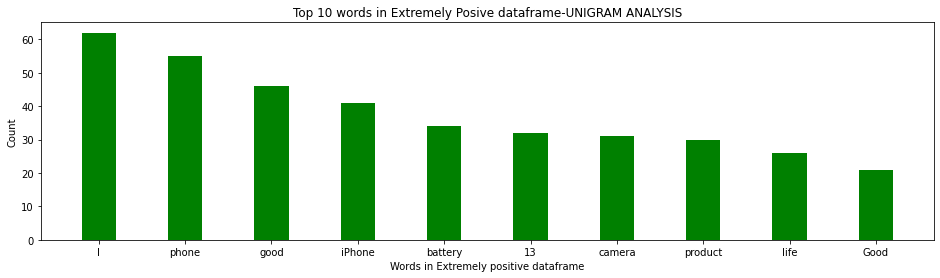

In [121]:
plt.figure(1,figsize=(16,4))
plt.bar(expos1,expos2, color ='green',
        width = 0.4)
plt.xlabel("Words in Extremely positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Extremely Posive dataframe-UNIGRAM ANALYSIS")
plt.savefig("Extremely positive-unigram.png")
plt.show()

In [90]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

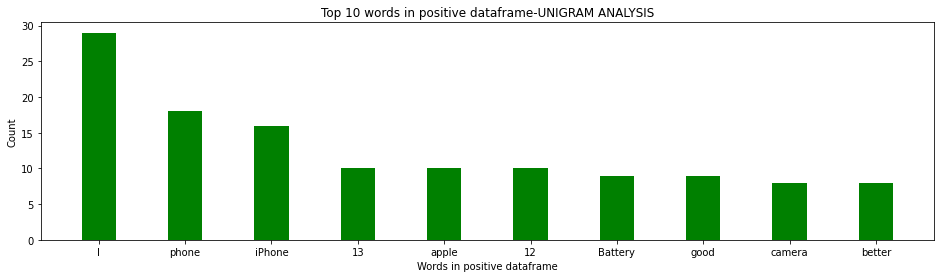

In [91]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

In [92]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

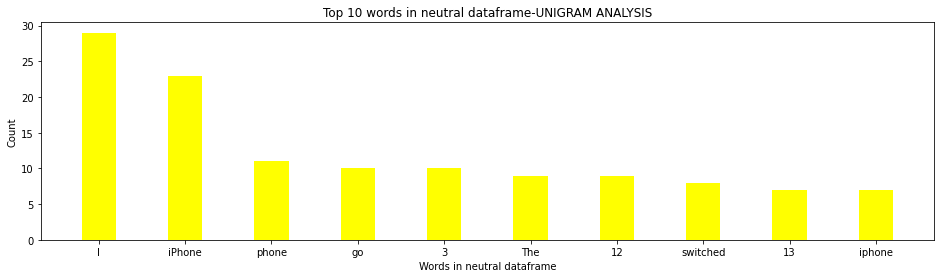

In [93]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [94]:
neg1=df_negetive[0][:10]
neg2=df_negetive[1][:10]

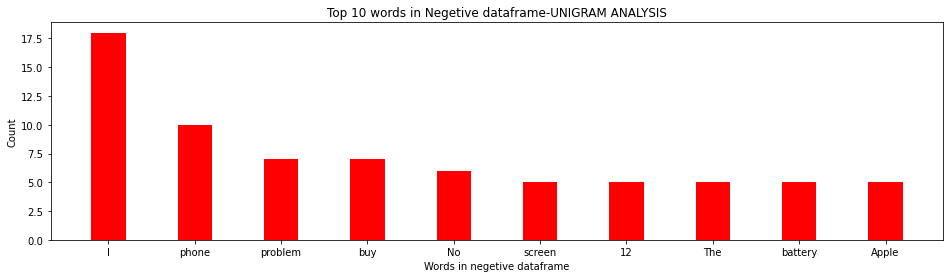

In [95]:
plt.figure(1,figsize=(16,4))
plt.bar(neg1,neg2, color ='red',
        width = 0.4)
plt.xlabel("Words in negetive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Negetive dataframe-UNIGRAM ANALYSIS")
plt.savefig("negetive-unigram.png")
plt.show()

In [96]:
exneg1=df_extreamelynegetive[0][:10]
exneg2=df_extreamelynegetive[1][:10]

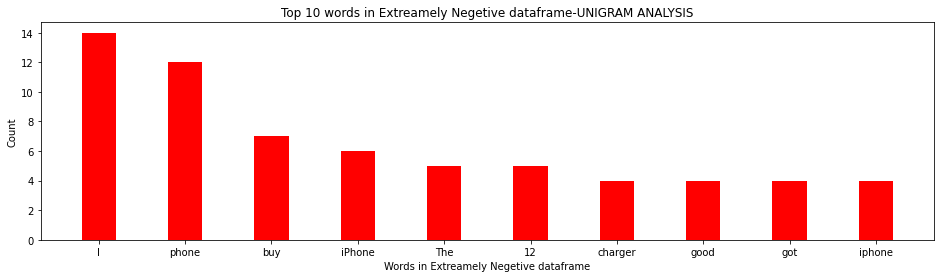

In [122]:
plt.figure(1,figsize=(16,4))
plt.bar(exneg1,exneg2, color ='red',
        width = 0.4)
plt.xlabel("Words in Extreamely Negetive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Extreamely Negetive dataframe-UNIGRAM ANALYSIS")
plt.savefig("Extreamely Negetive-unigram.png")
plt.show()

### Bi-Gram

In [98]:
#get the count of every word in the column of df dataframe
extremelypositiveValues2=defaultdict(int)
positiveValues2=defaultdict(int)
negetiveValues2=defaultdict(int)
neutralValues2=defaultdict(int)
extremelynegetiveValues2=defaultdict(int)

In [99]:
#get the count of every word in the column of df dataframe where sentiment="Extremely positive"
for text in df[df.Sentiment_of_the_Review=="Extremely positive"].review:
  for word in generate_N_grams(text,2):
    extremelypositiveValues2[word]+=1

Sentence after removing stopwords: ['What', 'I', 'say,', 'absolutely', 'I', 'enjoying', 'iOS', 'experience,', 'battery', 'life', 'amazing,', 'Best', 'Buy,', 'thing', 'I', 'missing', 'fingerprint', 'scanner.']
Sentence after removing stopwords: ['Otherwise', 'best', 'buy', 'Camera', 'excellent', 'pictures', 'sharp,clear,natural.']
Sentence after removing stopwords: ['Almost', 'The', 'Beast', 'One', '12', 'pro\nCamera', '13', 'pro', 'best', 'camers', 'This', 'another', 'awesome', 'product', 'Apple..']
Sentence after removing stopwords: ['Wonderful', 'Camera', 'quality\nFeather', 'touch\nGood', 'battery\nSuperb', 'Night', 'mode', 'Camera\n\nOverall,', 'wonderful', 'phone👍', 'In', 'one', 'word', 'fantastic….']
Sentence after removing stopwords: ['It', 'good', 'right', 'balance', 'size', 'performance\nBattery', 'life', 'major', 'USP', 'mobile', '…\n\nTwo', 'major', 'Cons', ':-\n120', 'htz', 'refresh', 'rate', 'must', 'price', 'point\nCharging', 'Speed', 'bit', 'slow', 'could', 'managed', 'g

Sentence after removing stopwords: ['Actually', 'I', 'Android', 'user', 'since', '10', 'Years', '&', 'Now', 'I', 'Switched', 'Iphone', 'Yes', 'little', 'difficult', 'adjust', 'comfortable', 'iphone', 'take', 'almost', '1', 'week', 'friendly', 'them\nOtherwise', 'I', 'Student', 'student', 'usage', 'The', 'Battery', 'gives', 'almost', '1.5', 'Days', 'full', 'charge', '&', 'No', 'Doubt', 'Performance', 'Next', 'Level\nCamera', 'Good', 'Both', 'Rear', '&', 'Front', 'But', 'miss', 'Telephoto', 'Lense', 'overall', 'good\nI', 'got', 'Huge', 'Discount', 'almost', 'I', 'spend', '63,000/-', 'INR', '128', 'GB\n\nTrust', 'If', 'sufficient', 'Fund', 'Go', 'it\nOtherwise', 'Next', 'Option', 'Iphone', '12', '50,000/-', 'I', 'think', 'price', 'Good\n\nThanks', 'Apple', 'iphone', 'quality', 'good.']
Sentence after removing stopwords: ['Battery', 'life', 'good', 'initially,', 'hope', 'remains', 'time.']
Sentence after removing stopwords: ['I', 'saw', 'nearby', 'stores\nIt', 'looks', 'almost', 'like', 'i

Sentence after removing stopwords: ['If', 'iPhone', '10/', '11', 'blindly', 'purchase', 'Iphone', '13', '256', 'gb', 'variant', 'purchased', 'reliance', 'digital', 'really', 'value', 'money', 'phone', 'especially', 'battery', 'back', 'mind', 'blowing', 'overall', 'good', 'phone.']
Sentence after removing stopwords: ['Its', 'great', 'deal', 'purchase', 'one', ',', 'great', 'camara', 'well', 'focused', ',', 'best', 'ever', 'battery', 'backup.....']
Sentence after removing stopwords: ['I', 'recently', 'got', 'iPhone', '13', '128', 'gb', 'got', 'amazed', 'camera', 'things……worth', 'ur', 'money', 'loved', 'product', 'Play', 'Video\n', 'Good', 'experiance', 'As', 'first', 'time', 'iPhone', 'user,', 'I', 'confused', 'buy', 'iPhone', '13', '12', 'though', 'price', 'difference', 'manageable…so', 'reviews', 'conclusion', 'I', 'went', 'iPhone', '13', 'one', 'month', 'usage', 'I', 'say', 'I', 'made', 'right', 'choice.']
Sentence after removing stopwords: ['Hope', 'helps', 'choose', 'right', 'phone

Sentence after removing stopwords: ['IOS', 'awesome', 'actually', 'android', 'get', 'samsung', 's20', 'great', 'value', 'compitable', '13', 'Not', 'mark,', 'somany', 'glitches,', 'contacts', 'service', 'support', 'centre', 'physically', 'advise', 'formate', 'reset', 'mobile,', 'u', 'don’t', 'want', 'mobile', 'show', 'go', 'better', 'options', 'higher', 'end', 'android.']
Sentence after removing stopwords: ['tl;dr:\nIf', 'spend', 'money', 'want', 'better', 'camera', 'go', 'Pro', 'ProMax\nIf', 'like', 'Apple', 'EcoSystem', 'get', 'else', 'stick', 'Android\n\nPros', ':\n1.']
Sentence after removing stopwords: ['Good', 'Display', '/', 'Brightness', '(Supports', 'Dark', 'mode', 'You', 'control', 'White', 'Tone', 'nice).']
Sentence after removing stopwords: ['Good', 'Battery', 'Life', '(iPhone', '13', 'Series', 'good', 'battery', 'life', 'ensure', 'supported', 'charger)', 'I', 'use', "MacBook's", 'charger', 'charges', 'phone', 'pretty', 'quickly.']
Sentence after removing stopwords: ['Best',

In [100]:
#get the count of every word in the column of df dataframe Sentiment_of_the_Review="Positive"
for text in df[df.Sentiment_of_the_Review=="Positive"].review:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['Thank', 'amazon', 'Go', 'without', 'hesitation👍', 'I', 'thought', 'upgrading', '11', '13', 'would', 'hassle.']
Sentence after removing stopwords: ['I', 'could', 'transfer', 'data', '11', '13', 'easily,', 'Never', 'even', 'connect', 'pc', 'download', 'app.']
Sentence after removing stopwords: ['Nice', 'product.']
Sentence after removing stopwords: ['Packing', 'good.']
Sentence after removing stopwords: ['Battery', 'performance', 'improved', 'apple.']
Sentence after removing stopwords: ['Overall', 'performance', 'good.']
Sentence after removing stopwords: ['However', 'looks', 'big', 'hand', 'slippery.']
Sentence after removing stopwords: ['Phone', 'looks', 'good', 'basically', 'diagonal', 'camera.']
Sentence after removing stopwords: ['All', 'good', 'experience.']
Sentence after removing stopwords: ['Its', 'phone', 'feels', 'differently', 'hand', 'compared', 'phones.']
Sentence after removing stopwords: ['I', 'upgrade', 'newer', 'version', 'Good', 'ph

Sentence after removing stopwords: ['Over', 'years,', 'become', 'competitive', 'ever', 'lot', 'smartphone', 'makers', 'launching', 'flagship', 'devices', 'every', 'six', 'months.']
Sentence after removing stopwords: ['Amid', 'challenging', 'times', 'Apple,', 'like', 'bunch', 'companies,', 'maintained', 'yearly', 'update', 'cycle', 'iPhones.']
Sentence after removing stopwords: ['In', 'series,', 'company,', 'customary,', 'announced', 'iPhone', '13', 'successor', 'last', 'year’s', 'iPhone', '12.']
Sentence after removing stopwords: ['Then', 'features', 'like', 'smaller', 'notch', 'less', 'pronounced', 'rear', 'camera', 'module', 'might', 'seem', 'insignificant', 'compared', 'mentioned', 'features', 'make', 'world', 'difference', 'comes', 'usage.']
Sentence after removing stopwords: ['Good', 'offers', 'Camera', 'impressive', 'comperative', 'old', 'phones.']
Sentence after removing stopwords: ['Good', 'Phone', 'Same', 'I', 'phone', '12', '😑.']
Sentence after removing stopwords: ['If', 'wan

In [101]:
#get the count of every word in the column of df dataframe where Sentiment_of_the_Review="Neutral"
for text in df[df.Sentiment_of_the_Review=="Neutral"].review:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['Due', 'covid', 'wear', 'mask.']
Sentence after removing stopwords: ['Beast', 'performer..']
Sentence after removing stopwords: ['This', 'looks', 'professional', 'colour', 'perfect👍.']
Sentence after removing stopwords: ['You', 'don’t', 'need', 'write', 'anything', 'comes', 'iPhone', 'iPhone', 'rules', 'world.']
Sentence after removing stopwords: ['Simply', 'amazing…', 'price', 'much', 'though.']
Sentence after removing stopwords: ['Got', 'discount', 'republic', 'sale.']
Sentence after removing stopwords: ['I', 'using', 'I', 'Phone6', 'baught', 'I', 'phone13.']
Sentence after removing stopwords: ['Especially', '4K', 'HDR', 'video', 'recording', 'photography.']
Sentence after removing stopwords: ['Got', 'delivered', 'quickly.']
Sentence after removing stopwords: ['Battery', 'life', 'extra', 'ordinary.']
Sentence after removing stopwords: ['Battery', 'Camera', 'OS', 'everything’s', 'buttery', 'smooth!']
Sentence after removing stopwords: ['Iphone13', '

Sentence after removing stopwords: ['Obviously', 'price', 'point', 'could', 'little', 'affordable.']
Sentence after removing stopwords: ['There', 'Light', 'source', 'flares', 'camera', 'image', 'direct', 'phone', 'camera', 'light', 'source.']
Sentence after removing stopwords: ['But', 'use', 'Snapseed', 'app', 'remove', 'it.']
Sentence after removing stopwords: ['Phone', 'keeps', 'hanging.']
Sentence after removing stopwords: ['Its', 'topical', 'iPhone', 'similar', 'previous', 'gens\nBut', 'battery', 'life', 'incredibly.']
Sentence after removing stopwords: ['I', 'moderate', 'user', 'comes', 'cellphones', 'i.e', 'basic', 'Instagram', 'Facebook', 'WhatsApp', 'YouTube', 'Netflix.']
Sentence after removing stopwords: ['Upgraded', '7', 'plus', '4.6', 'years.']
Sentence after removing stopwords: ['My', 'advice', 'it’s', 'highly', 'paid', 'model,', 'use', 'minimum', '3', 'years.']
Sentence after removing stopwords: ['After', 'usage', '20min,', 'I', 'see', 'fingerprints', 'phone.']
Sentence a

In [102]:
#get the count of every word in the column of df dataframe where Sentiment_of_the_Review="Negetive"
for text in df[df.Sentiment_of_the_Review=="Negetive"].review:
  for word in generate_N_grams(text,2):
    negetiveValues2[word]+=1

Sentence after removing stopwords: ['Just', 'go', 'need', 'explorer.']
Sentence after removing stopwords: ['Ecosystem', 'unmatched.']
Sentence after removing stopwords: ['User', 'Interface\n\nWhat', 'miss?']
Sentence after removing stopwords: ['There', 'charger.']
Sentence after removing stopwords: ['No', 'headphones.']
Sentence after removing stopwords: ['No', 'cover', 'screen', 'guard.']
Sentence after removing stopwords: ['Im', 'satisfied', 'cable,', 'provided', 'usb', 'lightning', 'cable.']
Sentence after removing stopwords: ['Price', 'gap:', 'Iphone', '12', '70,000', 'INR', 'offers', 'present.']
Sentence after removing stopwords: ['The', 'problem', 'I', 'ever', 'faced', 'entire', 'lifespan', 'battery', 'life.']
Sentence after removing stopwords: ['And', 'Apple', 'finally', 'broken', 'that.']
Sentence after removing stopwords: ['Because', 'much', 'difference', '12', '13.']
Sentence after removing stopwords: ['It', 'another', 'way', 'selling', 'accessories', 'extremely', 'high', 'bi

In [103]:
#get the count of every word in the column of df dataframe where Sentiment_of_the_Review="Extremely Negetive"
for text in df[df.Sentiment_of_the_Review=="Extremely Negetive"].review:
  for word in generate_N_grams(text,2):
    extremelynegetiveValues2[word]+=1

Sentence after removing stopwords: ['It’s', 'irritating', 'time', 'enter', 'password.']
Sentence after removing stopwords: ['Slightly', 'overpriced', 'won’t', 'regret', 'long', 'term.']
Sentence after removing stopwords: ['The', 'disappointing', 'thing', 'stopped', 'giving', 'proper', 'charger', 'also', 'earphones..']
Sentence after removing stopwords: ['But', 'difficult', 'live', 'one', 'kidney!!!']
Sentence after removing stopwords: ['The', 'problem', 'lies', 'accessories', 'forced', 'purchase.']
Sentence after removing stopwords: ['Very', 'low', 'quality', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'I', "can't", 'afford', 'cover', '😂😂😂😂\n\nAnd', 'giving', 'discount', 'phone', '😂', 'I', 'use', 'launcher', '😂😂', 'Good', 'buy', 'phone', '12', 'price', 'much', 'good', 'opinion', '11', 'pro', 'Ignore', 'negative', 'comments', 'made', 'amateurs.']
Sentence after removing stopwords: ['Also,', 'Apple', 'providing', 'charger', 'environment', 'purposes,', 'fake', 'I', 'agree', 'it.']
Sen

In [105]:
df_extremelypositive2=pd.DataFrame(sorted(extremelypositiveValues2.items(),key=lambda x:x[1],reverse=True))
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negetive2=pd.DataFrame(sorted(negetiveValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))
df_extremelynegetive2=pd.DataFrame(sorted(extremelynegetiveValues2.items(),key=lambda x:x[1],reverse=True))

In [107]:
expd1bi=df_extremelypositive2[0][:10]
expd2bi=df_extremelypositive2[1][:10]

In [108]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [109]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

In [111]:
ned1bi=df_negetive2[0][:10]
ned2bi=df_negetive2[1][:10]

In [112]:
exned1bi=df_extremelynegetive2[0][:10]
exned2bi=df_extremelynegetive2[1][:10]

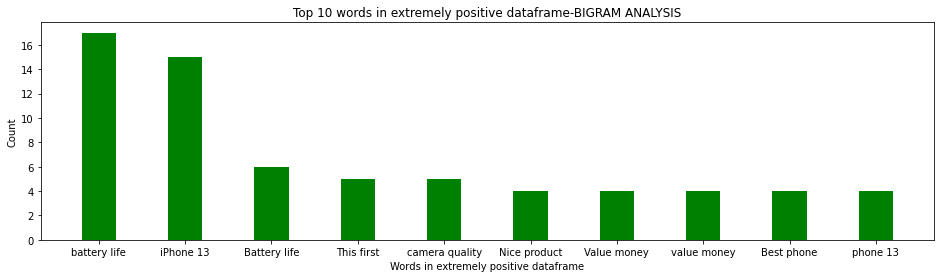

In [116]:
plt.figure(1,figsize=(16,4))
plt.bar(expd1bi,expd2bi, color ='green',
        width = 0.4)
plt.xlabel("Words in extremely positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in extremely positive dataframe-BIGRAM ANALYSIS")
plt.savefig("extremely positive-bigram.png")
plt.show()

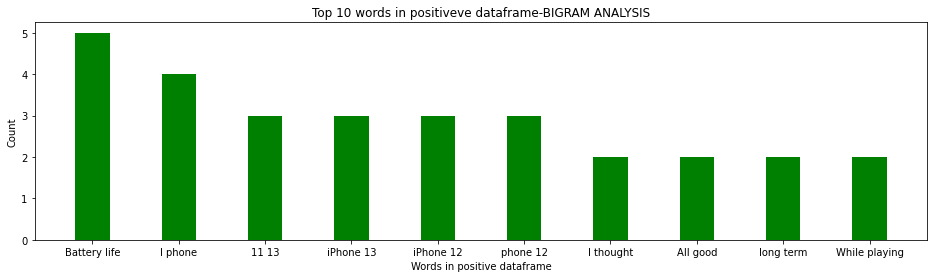

In [117]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positiveve dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

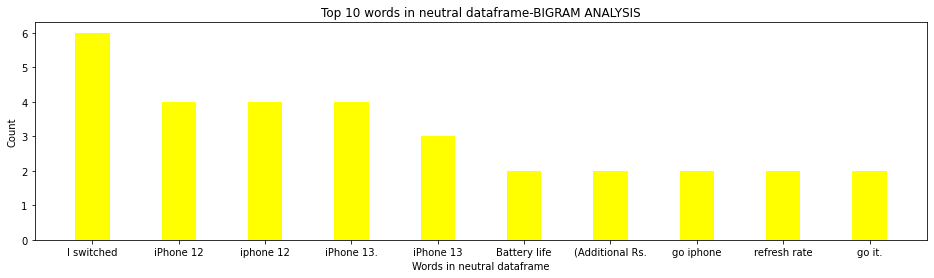

In [118]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

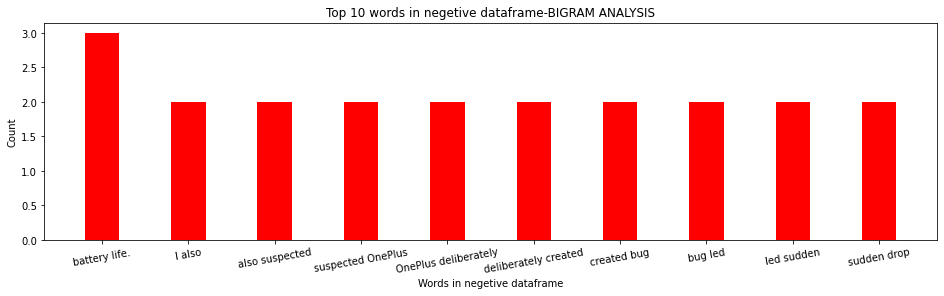

In [133]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4,)
plt.xlabel("Words in negetive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negetive dataframe-BIGRAM ANALYSIS")
plt.xticks(rotation=10)
plt.savefig("negetive-bigram.png")
plt.show()

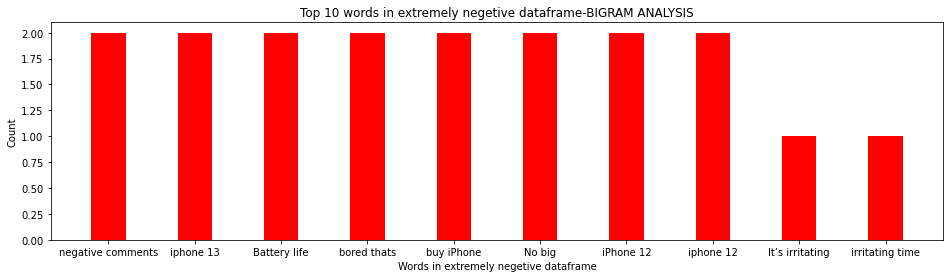

In [120]:
plt.figure(1,figsize=(16,4))
plt.bar(exned1bi,exned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in extremely negetive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in extremely negetive dataframe-BIGRAM ANALYSIS")
plt.savefig("extremely negetive-bigram.png")
plt.show()